# US Politics This Week Ad Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#CONSTANTS
TEST_DATA_FILE = 'test_data.csv'
VIEWER_DATA_FILE = 'viewer_data.csv'
VIEWER_ID = 'viewer_id'
SAW_LOCAL_AD = 'test'
WATCHED_POLITICS = 'watched'

# 1. Read Test dataset and display columns

In [21]:
viewer_data = pd.read_csv(VIEWER_DATA_FILE)
test_data = pd.read_csv(TEST_DATA_FILE)
print(len(test_data))
test_data.head()

418026


,viewer_id,date,tv_make,tv_size,uhd_capable,tv_provider,total_time_watched,watched,test
0,24726768,2018-01-16,Sony,70,0,Comcast,10.75,0,1
1,25001464,2018-01-18,Sony,32,0,NaN,2.75,0,0
2,28291998,2018-01-18,Sony,50,1,Dish Network,20.00,0,0
3,17057157,2018-01-19,Sony,32,0,Comcast,1.50,0,0
4,29504447,2018-01-17,Sony,32,0,Comcast,17.50,0,0


In [ ]:
sns.pairplot(test_data[['tv_make', 'tv_size', 'uhd_capable', 'tv_provider', 'total_time_watched', 'watched', 'test']])

418020


# 2. Check if Viewers who saw ads with local Mayors watched US Politics This Week less

let's first check for null values and duplicate viewer ids. Ok there are 6 duplicate viewer IDs.

In [ ]:
print(f'Number of duplicate IDs: {len(test_data) -test_data[VIEWER_ID].nunique()}')
[print(col,test_data[col].isnull().sum()) for col in test_data.columns]

In [ ]:
print(test_data[test_data.duplicated(subset=[VIEWER_ID],keep=False)][[VIEWER_ID,'watched','test']].sort_values(by=VIEWER_ID))

(array([213695.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 204325.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

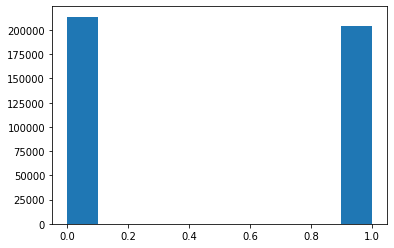

In [22]:
test_data = test_data.drop_duplicates(subset = [VIEWER_ID])
plt.hist(test_data[SAW_LOCAL_AD])

In [23]:
print(len(test_data))
test_data = pd.merge(test_data, viewer_data, how='left', on = VIEWER_ID )
print(len(test_data))

418020
418020


(array([213695.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 204325.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

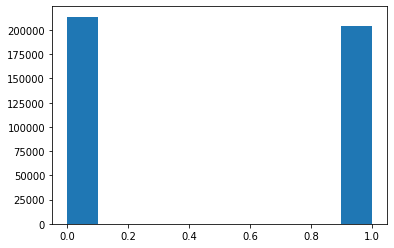

In [ ]:
plt.hist(test_data[WATCHED_POLITICS])

In [5]:
dfs = []
names = ['saw local ad', 'no local ad']
saw_local_ad = test_data.loc[test_data[SAW_LOCAL_AD]==1]
no_ad = test_data.loc[test_data[SAW_LOCAL_AD]==0]
dfs.append(saw_local_ad)
dfs.append(no_ad)
for df, name in zip(dfs, names):
    print(f'{name} length: {len(df)} ---------')
    print(f'number watched: {len(df.loc[df[WATCHED_POLITICS]==1])}')
    print(f'number did not watch:{len(df.loc[df[WATCHED_POLITICS]==0])}')
    percent_watched = 100*len(df.loc[df[WATCHED_POLITICS]==1])/len(df)
    percent_not_watched = 100*len(df.loc[df[WATCHED_POLITICS]==0])/len(df)
    print(f'Saw Local Ad: Watched: {percent_watched} Did Not Watch: {percent_not_watched}')


saw local ad length: 204325 ---------
number watched: 9354
number did not watch:194971
Saw Local Ad: Watched: 4.578000734124556 Did Not Watch: 95.42199926587544
no local ad length: 213695 ---------
number watched: 13447
number did not watch:200248
Saw Local Ad: Watched: 6.292613304008049 Did Not Watch: 93.70738669599196


So, viewers that saw the local ad watched US Politics This Week ~1.73% less than viewers who did not see the ad. This is not expected, but may be due to the samples not being stratified across users by age, gender, tv_size, etc evenly.

# Why less viewers that saw Local Ad watched US Politics This Week

Let's first merge in viewer data, and double check that we do not lose an viewers due to not having their viewer data

In [6]:
print(len(saw_local_ad))
saw_local_ad = pd.merge(saw_local_ad, viewer_data, how='left', on = VIEWER_ID )
print(len(saw_local_ad))
print(len(no_ad))
no_ad = pd.merge(no_ad, viewer_data, how = 'left', on = VIEWER_ID)
print(len(no_ad))


204325
204325
213695
213695


In [ ]:
#df['zipcode'] = df.zipcode.astype(str)
print(saw_local_ad.dtypes)
#saw_local_ad['tv_provider'] = saw_local_ad['tv_provider'].astype('category')
#df['zipcode'] = df.zipcode.astype('category')
print(saw_local_ad['tv_provider'].dtypes)
print(saw_local_ad['tv_provider'].unique())


In [ ]:
print(len(saw_local_ad))
print(len(no_ad))
columns = ['gender']#['date', 'tv_make','tv_size', 'uhd_capable' ]
           #'watched', 'test', 'gender', 'age', 'city']
print('here')
for col in columns:
    print(col)
    figure = plt.figure()
    histmin = min(saw_local_ad[col].min(), no_ad[col].min())
    histmax = max(saw_local_ad[col].max(), no_ad[col].max())
    nbins = 20
    local_ad_ndarray = plt.hist(saw_local_ad[col], label = 'Saw Local Ad', density = True)
    no_ad_ndarray = plt.hist(no_ad[col], label = 'No Local Ad', density = True)
    print(local_ad_ndarray[0])
    print(no_ad_ndarray[0])
    #local_ad_hist = np.histogram(saw_local_ad, range=(histmin,histmax), bins = nbins )
    #no_ad_hist = np
    #hist1, _ = numpy.histogram(img1,range=(min,max), bins=nbins)
    #hist2, _ = numpy.histogram(img2,range=(min,max), bins=nbins)
    #diff = local_ad_ndarray[0]-no_ad_ndarray[0]


    #plt.hist(diff, bins = local_ad_ndarray[1], label = "Saw Local Ad - No Local Ad")
    #count, division = pd.np.histogram(saw_local_ad[col].values)
    #print(count)
    #print(division)
    plt.title(col)
    #plt.ylim(0.4,0.55)
    plt.legend()


In [7]:
#nans = test_data[test_data.isna().any(axis=1)]
test_data = pd.merge(test_data, viewer_data, how='left', on = VIEWER_ID )
test_data.head()
#nans = test_data[test_data['city'].isnull()]
#print(nans)#print(len(nans))

,viewer_id,date,tv_make,tv_size,uhd_capable,tv_provider,total_time_watched,watched,test,gender,age,city
0,24726768,2018-01-16,Sony,70,0,Comcast,10.75,0,1,Male,52.0,Boston
1,25001464,2018-01-18,Sony,32,0,NaN,2.75,0,0,Male,38.0,New York
2,28291998,2018-01-18,Sony,50,1,Dish Network,20.00,0,0,Female,38.0,San Francisco
3,17057157,2018-01-19,Sony,32,0,Comcast,1.50,0,0,Male,39.0,Philadelphia
4,29504447,2018-01-17,Sony,32,0,Comcast,17.50,0,0,Female,57.0,Detroit


In [18]:
questionable = ['tv_provider', 'gender', 'age', 'city']
for col in questionable:
    nans = test_data[test_data[col].isnull()]
    print(f'{col} has {len(nans)} NaN values')
#for col in questionable:
#nans = test_data[test_data['tv_provider'].isnull()]
print(len(nans))
#plt.hist(nans['test'])
#plt.hist(nans['watched'])

tv_provider has 52718 NaN values
gender has 556 NaN values
age has 556 NaN values
city has 556 NaN values
556
